# Set up

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.colors import ListedColormap
import seaborn as sns
import itertools
from itertools import combinations

import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from xgboost.sklearn import XGBClassifier
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import preprocessing

import xgboost as xgb

np.random.seed(42)

# Import  and explore data

In [7]:
# import data
df = pd.read_excel("C:/Users/14702/OneDrive/Desktop/spambase.xlsx")

# inspect NA
df.isnull().sum()

# show first five rows
df.head()

# statistical description 
df.describe()  

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.064769,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.392893,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,43.000000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [8]:
# retrieving Attributes
X = df.values[:,:57]
y = df.values[:,57]

In [12]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Classification Model

In [3]:
# we want to use cross validation to tuning parameters
inner_cv = KFold(n_splits=5, shuffle=True,random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True,random_state=42)

In [63]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Function to calculate accuracy and plot confusion matrix 
def cal_accuracy(y_test, y_pred): 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix,classes=["1","0"],
                      title='Confusion matrix, without normalization')
    
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["1","0"], normalize=True,
                      title='Normalized confusion matrix')
    
    plt.show()
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    tp = cnf_matrix[[0],[0]]
    fp = cnf_matrix[[0],[1]]
    fn = cnf_matrix[[1],[0]]
    tn = cnf_matrix[[1],[1]]
    print("Cost-sensitive Adjusted Accuracy : ",(tp+tn)/(10*fp+10*fn+tp+tn))
    recall = tp/(tp+fn*10)
    precision = tp/(tp+fp*10)
    print("Cost-sensitive Adjusted F1-score : ",2*recall*precision/(recall+precision))

In [18]:
######################################### Decision Tree  #########################################

warnings.filterwarnings('ignore')

# Choosing depth of the tree AND splitting criterion AND min_samples_leaf AND min_samples_split
gs_dt2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,None],
                               'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5],
                              'min_samples_split':[2,3,4,5,6,7,8,9,10]}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=-1)

gs_dt2 = gs_dt2.fit(X_train, y_train)
print("Decision Tree Parameter Tuning")
print("Non-nested CV F1-score: ", gs_dt2.best_score_)
print("Optimal Parameter: ", gs_dt2.best_params_)
print("Optimal Estimator: ", gs_dt2.best_estimator_)
nested_score_gs_dt2 = cross_val_score(gs_dt2, X=X_train, y= y_train, cv=outer_cv)
print("Nested CV F1-score: ",nested_score_gs_dt2.mean(), " +/- ", nested_score_gs_dt2.std())

Decision Tree Parameter Tuning
Non-nested CV F1-score:  0.89528446724946
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
Nested CV F1-score:  0.8877223931705653  +/-  0.01867862711895864


Accuracy :  91.42236699239956
Report :                precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       531
         1.0       0.92      0.87      0.90       390

   micro avg       0.91      0.91      0.91       921
   macro avg       0.92      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921

Confusion matrix, without normalization
[[502  29]
 [ 50 340]]
Normalized confusion matrix
[[0.95 0.05]
 [0.13 0.87]]


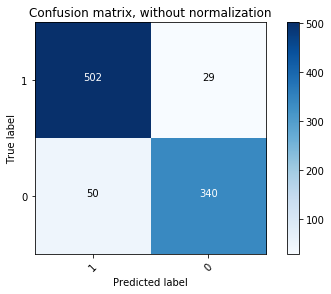

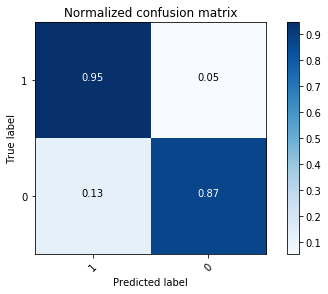

Cost-sensitive Adjusted Accuracy :  [0.52]
Cost-sensitive Adjusted F1-score :  [0.56]
None


In [64]:
# Decision Tree Classifier
clf_dt = DecisionTreeClassifier(max_depth=None,criterion='entropy',
                              min_samples_leaf=2, min_samples_split=2,random_state=42)


# Make predictions based on the classifiersrandom_state=42)
clf_dt.fit(X_train, y_train) 
y_pred = clf_dt.predict(X_test) 

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))                             


Accuracy :  81.43322475570032
Report :                precision    recall  f1-score   support

         0.0       0.95      0.72      0.82       531
         1.0       0.71      0.95      0.81       390

   micro avg       0.81      0.81      0.81       921
   macro avg       0.83      0.83      0.81       921
weighted avg       0.85      0.81      0.81       921

Confusion matrix, without normalization
[[380 151]
 [ 20 370]]
Normalized confusion matrix
[[0.72 0.28]
 [0.05 0.95]]


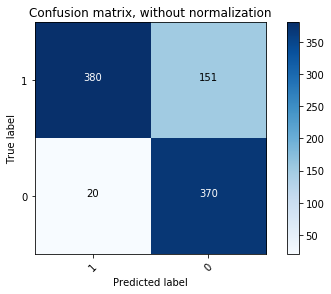

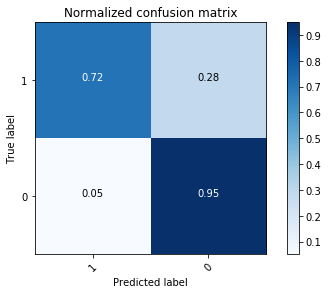

Cost-sensitive Adjusted Accuracy :  [0.3]
Cost-sensitive Adjusted F1-score :  [0.31]
None


In [65]:
######################################### Naïve Bayes #########################################

# Gaussian Naïve Bayes
clf1 = GaussianNB()
clf1 = clf1.fit(X_train, y_train)
y_pred=clf1.predict(X_test)

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))    


Accuracy :  78.61020629750271
Report :                precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       531
         1.0       0.76      0.72      0.74       390

   micro avg       0.79      0.79      0.79       921
   macro avg       0.78      0.78      0.78       921
weighted avg       0.79      0.79      0.79       921

Confusion matrix, without normalization
[[445  86]
 [111 279]]
Normalized confusion matrix
[[0.84 0.16]
 [0.28 0.72]]


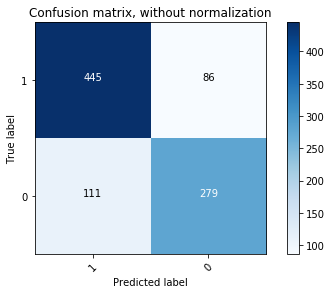

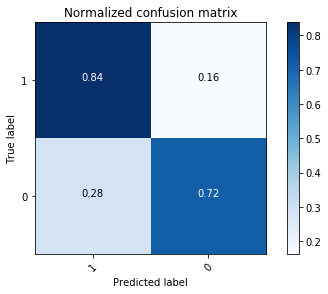

Cost-sensitive Adjusted Accuracy :  [0.27]
Cost-sensitive Adjusted F1-score :  [0.31]
None


In [66]:
# Multinomial Naïve Bayes
clf2 = MultinomialNB()
clf2 = clf2.fit(X_train, y_train)
y_pred=clf2.predict(X_test)

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))    


Accuracy :  87.29641693811075
Report :                precision    recall  f1-score   support

         0.0       0.86      0.94      0.89       531
         1.0       0.90      0.79      0.84       390

   micro avg       0.87      0.87      0.87       921
   macro avg       0.88      0.86      0.87       921
weighted avg       0.88      0.87      0.87       921

Confusion matrix, without normalization
[[497  34]
 [ 83 307]]
Normalized confusion matrix
[[0.94 0.06]
 [0.21 0.79]]


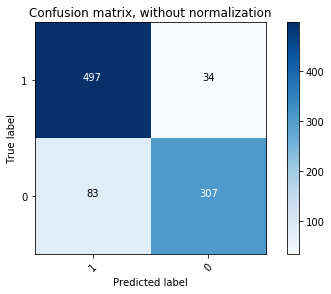

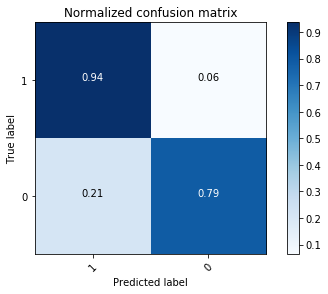

Cost-sensitive Adjusted Accuracy :  [0.41]
Cost-sensitive Adjusted F1-score :  [0.46]
None


In [67]:
# Bernoulli Naïve Bayes
clf3 = BernoulliNB()
clf3 = clf3.fit(X_train, y_train)
y_pred=clf3.predict(X_test)

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))

In [43]:
# normalization 
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

# Split train and test data
X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=42)

In [44]:
########################################## kNN ##################################################

# Choosing k for kNN AND type of distance
gs_knn2 = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': range(1,22),
                               'weights':['uniform','distance']}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=-1)

gs_knn2 = gs_knn2.fit(X_train_std,y_train)  
print("kNN Parameter Tuning")
print("Non-nested CV F1-score: ", gs_knn2.best_score_)
print("Optimal Parameter: ", gs_knn2.best_params_)
print("Optimal Estimator: ", gs_knn2.best_estimator_) 
nested_score_gs_knn2 = cross_val_score(gs_knn2, X=X_train_std, y=y_train, cv=outer_cv)
print("Nested CV F1-score: ",nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())

kNN Parameter Tuning
Non-nested CV F1-score:  0.8982944600812426
Optimal Parameter:  {'n_neighbors': 8, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='distance')
Nested CV F1-score:  0.8982094669463239  +/-  0.00911240710366879


Accuracy :  90.98805646036917
Report :                precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       531
         1.0       0.91      0.87      0.89       390

   micro avg       0.91      0.91      0.91       921
   macro avg       0.91      0.90      0.91       921
weighted avg       0.91      0.91      0.91       921

Confusion matrix, without normalization
[[499  32]
 [ 51 339]]
Normalized confusion matrix
[[0.94 0.06]
 [0.13 0.87]]


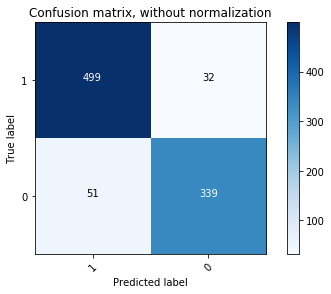

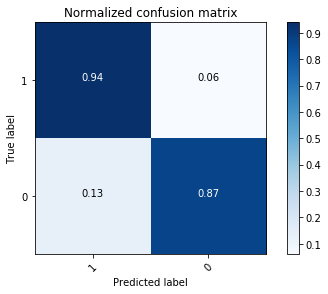

Cost-sensitive Adjusted Accuracy :  [0.5]
Cost-sensitive Adjusted F1-score :  [0.55]
None


In [68]:
# KNN Classifier
clf_knn = KNeighborsClassifier(n_neighbors=8,
                            p=2,
                            metric='minkowski',
                            weights='distance')

# Make predictions 
clf_knn = clf_knn.fit(X_train_std, y_train) 
y_pred = clf_knn.predict(X_test_std) 

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))                             


# ROC Curve

ROC AUC: 0.971 (+/- 0.028) [XGBoost]
ROC AUC: 0.955 (+/- 0.043) [Naïve Bayes]
ROC AUC: 0.939 (+/- 0.041) [kNN]


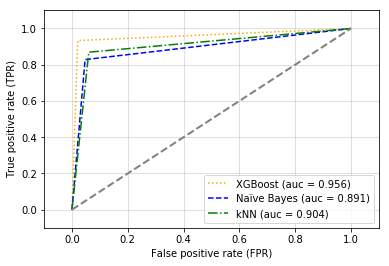

In [89]:
# Label the classifiers
clf_labels = ['XGBoost', 'Naïve Bayes','kNN']
all_clf = [clf_xgb, clf3, clf_knn]

# calculate AUC
for clf, label in zip([clf_xgb, clf3, clf_knn], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X_std,
                             y=y,
                             cv=5,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

# visualization   
colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    clf = clf.fit(X_train_std,y_train)
    y_pred = clf.predict(X_test_std) 
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

# Meta-modeling Techniques

In [76]:
########################################## XGBoost ##################################################

# Parameter tuning

param_test = {
 'max_depth':[2,3,4,5,6,7,8,9,10],
 'min_child_weight':[2,3,4,5,6,7,8,9,10],
 'learning_rate':[i/10.0 for i in range(0,8)]
}

gs_xgb = GridSearchCV(
    estimator = XGBClassifier(objective= 'binary:logistic',scale_pos_weight=1,seed=42), 
    param_grid = param_test, 
    scoring='f1',
    cv=inner_cv,
    n_jobs=-1)

gs_xgb = gs_xgb.fit(X_train_std,y_train)  
print("XGBoost Parameter Tuning")
print("Non-nested CV F1-score: ", gs_xgb.best_score_)
print("Optimal Parameter: ", gs_xgb.best_params_)
print("Optimal Estimator: ", gs_xgb.best_estimator_) 


XGBoost Parameter Tuning
Non-nested CV F1-score:  0.93563315046651
Optimal Parameter:  {'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 2}
Optimal Estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=8, min_child_weight=2, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=None, subsample=1,
       verbosity=1)


Accuracy :  95.98262757871878
Report :                precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       531
         1.0       0.97      0.93      0.95       390

   micro avg       0.96      0.96      0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921

Confusion matrix, without normalization
[[520  11]
 [ 26 364]]
Normalized confusion matrix
[[0.98 0.02]
 [0.07 0.93]]


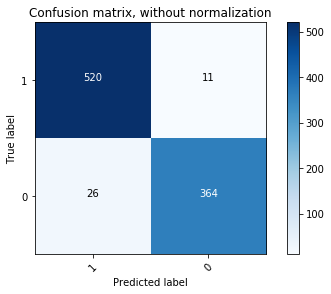

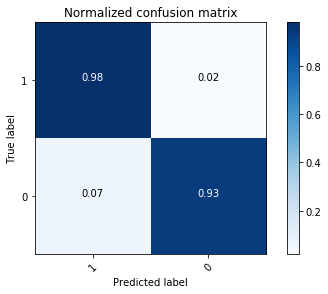

Cost-sensitive Adjusted Accuracy :  [0.7]
Cost-sensitive Adjusted F1-score :  [0.74]
None


In [77]:
# XGBoost Classifier
clf_xgb = XGBClassifier(learning_rate = 0.2, max_depth = 8, min_child_weight = 2,
                        objective= 'binary:logistic',scale_pos_weight=1,seed=42)

# Make predictions 
clf_xgb = clf_xgb.fit(X_train_std, y_train) 
y_pred = clf_xgb.predict(X_test_std) 

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))     

## Sequential feature selection algorithms

In [69]:
# attribute selection
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

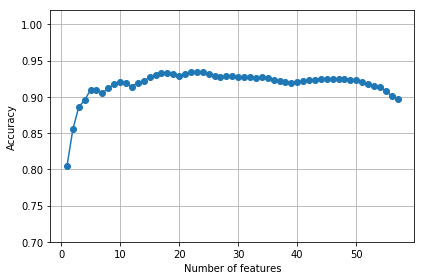

In [78]:
########################################## kNN ##################################################

knn = KNeighborsClassifier(n_neighbors=8,p=2,metric='minkowski',weights='distance')

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()

plt.show()

Accuracy :  90.77090119435395
Report :                precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       531
         1.0       0.92      0.86      0.89       390

   micro avg       0.91      0.91      0.91       921
   macro avg       0.91      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921

Confusion matrix, without normalization
[[502  29]
 [ 56 334]]
Normalized confusion matrix
[[0.95 0.05]
 [0.14 0.86]]


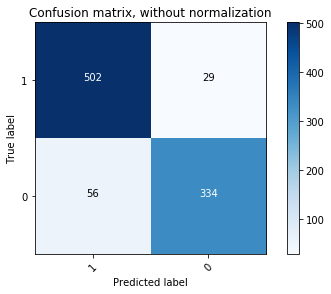

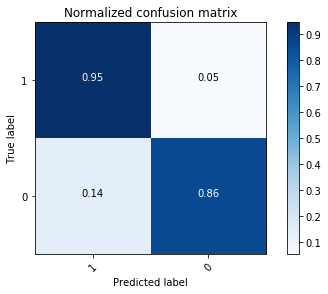

Cost-sensitive Adjusted Accuracy :  [0.5]
Cost-sensitive Adjusted F1-score :  [0.54]
None


In [88]:
k1 = list(sbs.subsets_[50])

# Make predictions 
knn = knn.fit(X_train_std[:, k1], y_train) 
y_pred = knn.predict(X_test_std[:, k1]) 

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))    


In [80]:
k3 = list(sbs.subsets_[50])

knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9209239130434783
Test accuracy: 0.8925081433224755
Training accuracy: 0.9097826086956522
Test accuracy: 0.8925081433224755


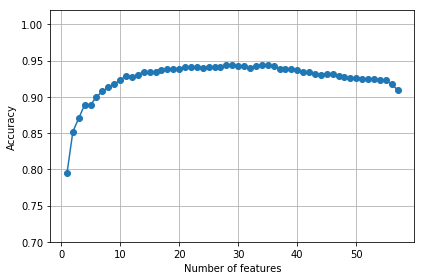

In [81]:
########################################## Naïve Bayes ##################################################

nb = BernoulliNB()

# selecting features
sbs = SBS(nb, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('feature_selection.png', dpi=300)
plt.show()

Accuracy :  89.90228013029315
Report :                precision    recall  f1-score   support

         0.0       0.88      0.95      0.92       531
         1.0       0.92      0.83      0.87       390

   micro avg       0.90      0.90      0.90       921
   macro avg       0.90      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921

Confusion matrix, without normalization
[[504  27]
 [ 66 324]]
Normalized confusion matrix
[[0.95 0.05]
 [0.17 0.83]]


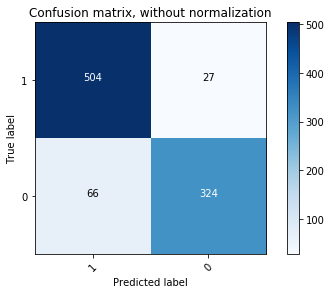

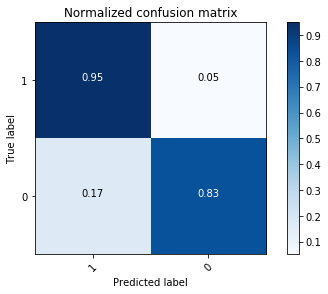

Cost-sensitive Adjusted Accuracy :  [0.47]
Cost-sensitive Adjusted F1-score :  [0.52]
None


In [85]:
k2 = list(sbs.subsets_[35])

# Make predictions 
nb = nb.fit(X_train_std[:, k2], y_train) 
y_pred = nb.predict(X_test_std[:, k2]) 

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))    

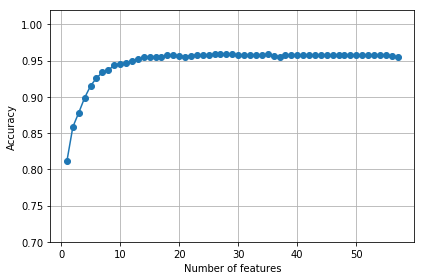

In [82]:
########################################## XGBoost ##################################################

xgb = XGBClassifier(objective= 'binary:logistic',scale_pos_weight=1,seed=42)

# selecting features
sbs = SBS(xgb, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()

plt.show()

Accuracy :  84.14766558089035
Report :                precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       531
         1.0       0.88      0.72      0.79       390

   micro avg       0.84      0.84      0.84       921
   macro avg       0.85      0.83      0.83       921
weighted avg       0.85      0.84      0.84       921

Confusion matrix, without normalization
[[494  37]
 [109 281]]
Normalized confusion matrix
[[0.93 0.07]
 [0.28 0.72]]


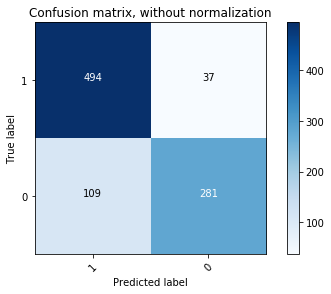

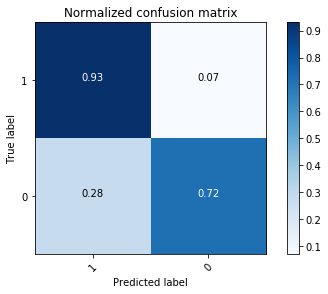

Cost-sensitive Adjusted Accuracy :  [0.35]
Cost-sensitive Adjusted F1-score :  [0.4]
None


In [84]:
k3 = list(sbs.subsets_[55])

# Make predictions 
xgb = xgb.fit(X_train_std[:, k3], y_train) 
y_pred = xgb.predict(X_test_std[:, k3]) 

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))   